In [1]:
import pandas as pd
import json
from functools import reduce
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Comunas

In [2]:
df2 = pd.read_excel('D5_Migracion-interna.xlsx', sheet_name=["2"], skiprows=3, nrows=348)

In [3]:
field = 'Comuna de residencia habitual actual' # 'Región de residencia habitual actual'

data = df2['2']
data = data.loc[lambda x: x[field] != 'País']
data

,Código región,Región de residencia habitual actual,Código provincia,Provincia de residencia habitual actual,Código comuna,Comuna de residencia habitual actual,Población censada,No migrante interno comunal,Aún no nacían (menores de 5 años),Arica,...,"Comuna ignorada, Región de Ñuble","Comuna ignorada, Región de Biobío","Comuna ignorada, Región de La Araucanía","Comuna ignorada, Región de Los Ríos","Comuna ignorada, Región de Los Lagos","Comuna ignorada, Región de Aysén del General Carlos Ibáñez del Campo","Comuna ignorada, Región de Magallanes y de la Antártica Chilena",Residencia habitual hace cinco años con región ignorada,Residencia habitual hace cinco años fuera del país,Residencia habitual hace cinco años ignorada
1,15,Arica y Parinacota,151,Arica,15101,Arica,241653,201834,12671,-,...,0,0,1,0,1,0,0,64,11844,2543
2,15,Arica y Parinacota,151,Arica,15102,Camarones,861,693,26,87,...,0,0,0,0,0,0,0,0,21,1
3,15,Arica y Parinacota,152,Parinacota,15201,Putre,1547,970,78,200,...,0,0,0,0,0,0,0,1,98,13
4,15,Arica y Parinacota,152,Parinacota,15202,General Lagos,508,384,44,27,...,0,0,0,0,0,0,0,0,43,3
5,1,Tarapacá,11,Iquique,1101,Iquique,199587,157039,9967,917,...,0,1,0,0,0,0,0,32,15278,2319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,12,Magallanes y de la Antártica Chilena,123,Tierra del Fuego,12301,Porvenir,6809,5152,366,4,...,0,0,0,0,0,0,0,0,287,20
343,12,Magallanes y de la Antártica Chilena,123,Tierra del Fuego,12302,Primavera,431,318,15,0,...,0,0,0,0,0,0,0,0,9,0
344,12,Magallanes y de la Antártica Chilena,123,Tierra del Fuego,12303,Timaukel,157,66,7,0,...,0,0,0,0,0,0,0,0,7,0
345,12,Magallanes y de la Antártica Chilena,124,Última Esperanza,12401,Natales,24152,19018,1125,14,...,0,0,0,0,0,0,1,5,976,150


In [4]:
data = data.replace('-', 0)

/tmp/ipykernel_20522/1482765331.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('-', 0)


In [5]:
field = 'Comuna de residencia habitual actual' # 'Región de residencia habitual actual'
regions = data[field].unique()[1:]

In [6]:
#regions

In [7]:
coords = pd.read_csv("comunas_coords.csv")
coords

,Código comuna,Comuna,Provincia,Región,Superficie (km2),Población Año 2017,Densidad (hab./km2),IDH 2005,Latitud (Decimal),Longitud (decimal),Latitud (Sexagesimal),Longitud (Sexagesimal)
0,15202,General Lagos,Parinacota,Arica y Parinacota,2244.4,684,0.31,0.670,-17.6528,-73.4000,-17°39' 10'',"-69°38' 6"""
1,15201,Putre,Parinacota,Arica y Parinacota,5902.5,2765,0.47,0.707,-18.2000,-73.3919,"-18°12' 0""",-69°34' 58''
2,15101,Arica,Arica,Arica y Parinacota,4799.4,221364,0.46,38.400,-18.4550,-73.3328,"-18°27' 18""","-70°17' 24"""
3,15102,Camarones,Arica,Arica y Parinacota,3927.0,1255,0.32,0.751,-19.0169,-73.3478,-19°1' 1'',-69°52' 1''
4,1403,Colchane,Tamarugal,Tarapacá,4015.6,1728,0.43,0.603,-19.2839,-68.9239,-19°17' 2'',"-68°40' 30"""
...,...,...,...,...,...,...,...,...,...,...,...,...
341,12101,Punta Arenas,Magallanes,Magallanes y Antártica Chilena,17846.3,131592,7.37,0.748,-53.1478,-72.4139,-53°8' 52'',-70°54' 25''
342,12301,Porvenir,Tierra del Fuego,Magallanes y Antártica Chilena,9707.4,6801,0.7,0.731,-53.2978,-72.4828,-53°17' 52'',"-70°23' 6"""
343,12303,Timaukel,Tierra del Fuego,Magallanes y Antártica Chilena,10758.9,405,0.04,0.717,-53.6719,-72.5000,-53°40' 19'',"-69°42' 36"""
344,12201,Cabo de Hornos,Antártica Chilena,Magallanes y Antártica Chilena,15578.7,2063,0.13,0.806,-54.9469,-72.4500,-54°56' 49'',-67°36' 25''


In [8]:
comunas = data.merge(coords, how="left")
comunas = comunas.sort_values(by='Latitud (Decimal)', ascending=False)
comunas

,Código región,Región de residencia habitual actual,Código provincia,Provincia de residencia habitual actual,Código comuna,Comuna de residencia habitual actual,Población censada,No migrante interno comunal,Aún no nacían (menores de 5 años),Arica,...,Provincia,Región,Superficie (km2),Población Año 2017,Densidad (hab./km2),IDH 2005,Latitud (Decimal),Longitud (decimal),Latitud (Sexagesimal),Longitud (Sexagesimal)
3,15,Arica y Parinacota,152,Parinacota,15202,General Lagos,508,384,44,27,...,Parinacota,Arica y Parinacota,2244.4,684,0.31,0.670,-17.6528,-73.4000,-17°39' 10'',"-69°38' 6"""
2,15,Arica y Parinacota,152,Parinacota,15201,Putre,1547,970,78,200,...,Parinacota,Arica y Parinacota,5902.5,2765,0.47,0.707,-18.2000,-73.3919,"-18°12' 0""",-69°34' 58''
0,15,Arica y Parinacota,151,Arica,15101,Arica,241653,201834,12671,0,...,Arica,Arica y Parinacota,4799.4,221364,0.46,38.400,-18.4550,-73.3328,"-18°27' 18""","-70°17' 24"""
1,15,Arica y Parinacota,151,Arica,15102,Camarones,861,693,26,87,...,Arica,Arica y Parinacota,3927.0,1255,0.32,0.751,-19.0169,-73.3478,-19°1' 1'',-69°52' 1''
8,1,Tarapacá,14,Del Tamarugal,1403,Colchane,790,452,70,5,...,Tamarugal,Tarapacá,4015.6,1728,0.43,0.603,-19.2839,-68.9239,-19°17' 2'',"-68°40' 30"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,12,Magallanes y de la Antártica Chilena,121,Magallanes,12101,Punta Arenas,132363,111417,5549,74,...,Magallanes,Magallanes y Antártica Chilena,17846.3,131592,7.37,0.748,-53.1478,-72.4139,-53°8' 52'',-70°54' 25''
341,12,Magallanes y de la Antártica Chilena,123,Tierra del Fuego,12301,Porvenir,6809,5152,366,4,...,Tierra del Fuego,Magallanes y Antártica Chilena,9707.4,6801,0.7,0.731,-53.2978,-72.4828,-53°17' 52'',"-70°23' 6"""
343,12,Magallanes y de la Antártica Chilena,123,Tierra del Fuego,12303,Timaukel,157,66,7,0,...,Tierra del Fuego,Magallanes y Antártica Chilena,10758.9,405,0.04,0.717,-53.6719,-72.5000,-53°40' 19'',"-69°42' 36"""
339,12,Magallanes y de la Antártica Chilena,122,Antártica Chilena,12201,Cabo de Hornos,1750,995,113,2,...,Antártica Chilena,Magallanes y Antártica Chilena,15578.7,2063,0.13,0.806,-54.9469,-72.4500,-54°56' 49'',-67°36' 25''


In [9]:
links = []
nodes = []

for idx1, region1 in enumerate(regions):
    #print(region1)
    for idx2, region2 in enumerate(regions[idx1:]):
        df1 = comunas.loc[lambda x: (x[field] == region1)]
        value_2a1 = df1[region2].iloc[0] # & (x['Sexo'] == 'Total Región')
        df2 = comunas.loc[lambda x: (x[field] == region2)]
        value_1a2 = df2[region1].iloc[0]
        delta_value = value_2a1 - value_1a2
        
        if delta_value == 0:
            continue
        if delta_value > 0:
            link = {}
            link['source'] = region2
            link['target'] = region1
            link['value'] = int(delta_value)
            link['s2t'] = int(value_2a1)
            link['t2s'] = int(value_1a2)
            link['direction'] = 'north'
        else:
            link = {}
            link['source'] = region1
            link['target'] = region2
            link['value'] = int(abs(delta_value))
            link['t2s'] = int(value_2a1)
            link['s2t'] = int(value_1a2)
            link['direction'] = 'south'

        links.append(link)
        
    node = {}
    node['name'] = region1
    node['region'] = df1['Región de residencia habitual actual'].iloc[0]
    node['poblacion'] = int(df1['Población censada'].iloc[0])
    node['latitud'] = int(df1['Latitud (Decimal)'].iloc[0])
    nodes.append(node)

In [10]:
regiones = data['Región de residencia habitual actual'].unique()

children = {}
for region in regiones:
    children[region] = []
children

{'Arica y Parinacota': [],
 'Tarapacá': [],
 'Antofagasta': [],
 'Atacama': [],
 'Coquimbo': [],
 'Valparaíso': [],
 'Metropolitana de Santiago': [],
 "Libertador General Bernardo O'Higgins": [],
 'Maule': [],
 'Ñuble': [],
 'Biobío': [],
 'La Araucanía': [],
 'Los Ríos': [],
 'Los Lagos': [],
 'Aysén del General Carlos Ibáñez del Campo': [],
 'Magallanes y de la Antártica Chilena': []}

In [11]:
all_comunas = []

for node in nodes:
    sources = filter(lambda x: x['source'] == node['name'], links)
    targets = filter(lambda x: x['target'] == node['name'], links)

    total_source = sum(map(lambda x: x['value'], list(sources)))
    total_target = sum(map(lambda x: x['value'], list(targets)))
    net = abs(total_source - total_target)
    direction = 'out' if total_source > total_target else 'in'

    node['from'] = int(total_source)
    node['to'] = int(total_target)
    node['net'] = int(net)
    node['direction'] = direction
    node['delta'] = net if direction == 'in' else -net

    children[node['region']].append(node)

    
    all_comunas.append(node)

#children

In [12]:
grouped_nodes = {
    'name': 'All',
    'children': list(map(lambda x: {'name': x, 'children': children[x]}, regiones))
}
#grouped_nodes

In [13]:
dataset = {
    'nodes': grouped_nodes,
    'links': links
}

In [14]:
with open('migracion_comunas.json', 'w') as outfile:
    json.dump(dataset, outfile)

## Scatter

In [92]:
y = np.array(list(map(lambda x: x['from'], nodes)))
x = np.array(list(map(lambda x: x['to'], nodes)))
size = np.array(list(map(lambda x: x['poblacion']/1000, nodes)))
color = np.array(list(map(lambda x: "#276419" if x['direction'] == 'in' else "#8e0152", nodes)))


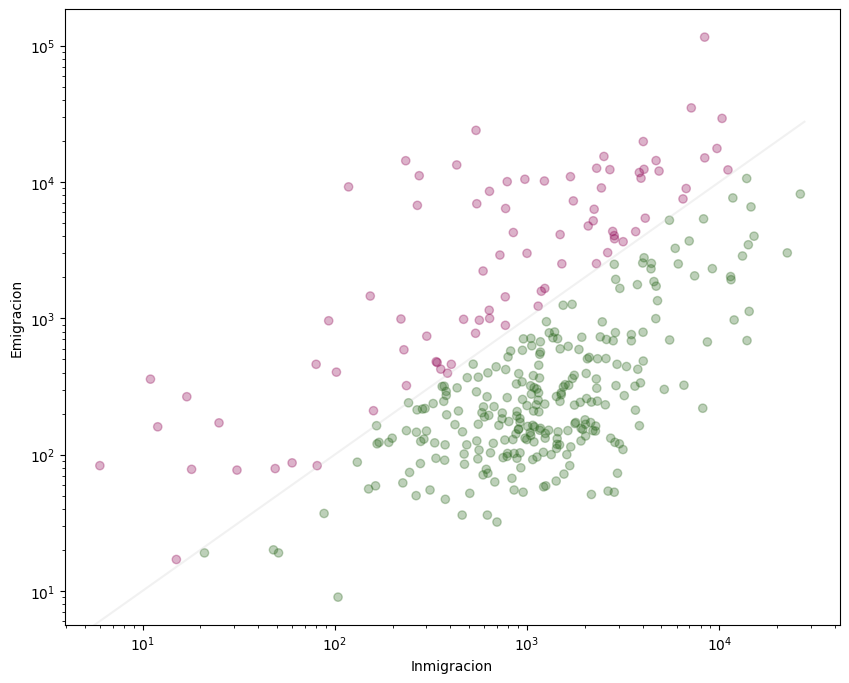

In [110]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.scatter(x, y, c=color, marker='o', alpha=0.3)
xmin, xmax = ax.get_xlim()

ax.plot([xmin, xmax],[xmin, xmax], '-', color='#d2d2d2', alpha=0.3)
ax.set_xlabel('Inmigracion')
ax.set_ylabel('Emigracion')

# ax.set_ylim(-6000, 6000)
ax.set_yscale("log")
ax.set_xscale("log")
# ax.set_xlim(-57, -16)

plt.show()
plt.close()

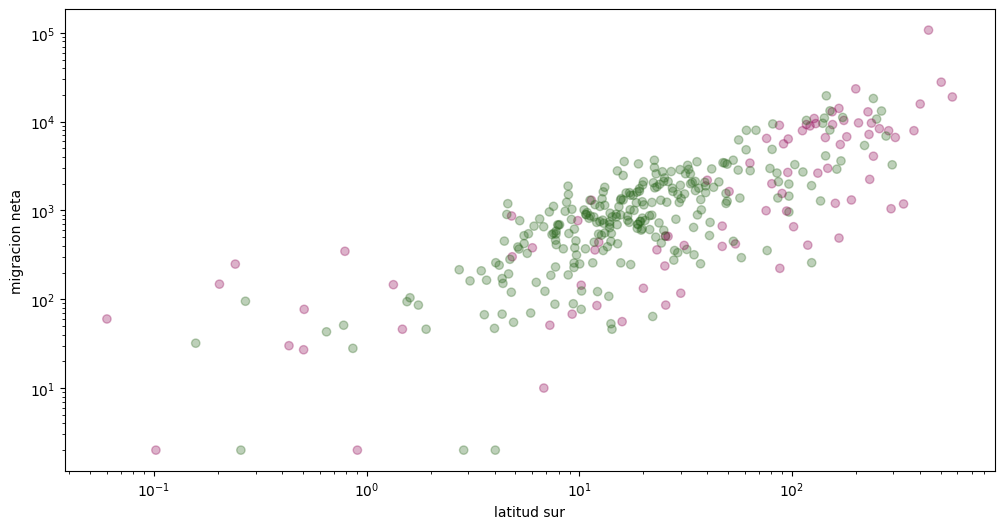

In [65]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax.scatter(size, y, c=color, marker='o', alpha=0.3)
ax.set_xlabel('latitud sur')
ax.set_ylabel('migracion neta')

# ax.set_ylim(-6000, 6000)
ax.set_yscale("log")
ax.set_xscale("log")
# ax.set_xlim(-57, -16)

plt.show()
plt.close()

## Matriz

In [23]:
data = df2['2']
data = data.replace('-', np.nan)

/tmp/ipykernel_34944/3587790781.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('-', np.nan)


In [24]:
field = 'Comuna de residencia habitual actual' # 'Región de residencia habitual actual'
regions = data[field].unique()[1:]


data = data.loc[lambda x: (x[field] != 'País')]
data = data.set_index(field)

columns_to_drop = [column for column in data.columns if not column in regions]
data = data.drop(columns_to_drop, axis=1)
data = data.reset_index()
data

,Comuna de residencia habitual actual,Arica,Camarones,Putre,General Lagos,Iquique,Alto Hospicio,Pozo Almonte,Camiña,Colchane,...,Laguna Blanca,Río Verde,San Gregorio,Cabo de Hornos,Antártica,Porvenir,Primavera,Timaukel,Natales,Torres del Paine
0,Arica,NaN,68.0,222.0,83.0,1644.0,430.0,95.0,25.0,10.0,...,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0
1,Camarones,87.0,NaN,1.0,0.0,5.0,1.0,0.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Putre,200.0,13.0,NaN,21.0,12.0,12.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,General Lagos,27.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Iquique,917.0,0.0,6.0,1.0,NaN,3106.0,382.0,18.0,21.0,...,0.0,0.0,0.0,0.0,1.0,4.0,0.0,1.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Porvenir,4.0,0.0,0.0,0.0,9.0,1.0,5.0,0.0,3.0,...,3.0,1.0,2.0,0.0,0.0,NaN,11.0,5.0,22.0,1.0
342,Primavera,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,NaN,1.0,1.0,0.0
343,Timaukel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,8.0,0.0,NaN,1.0,1.0
344,Natales,14.0,0.0,0.0,0.0,21.0,2.0,0.0,0.0,0.0,...,4.0,6.0,0.0,10.0,0.0,37.0,15.0,2.0,NaN,56.0


In [25]:
data_net = data.copy()

for idx1, region1 in enumerate(regions):
    for idx2, region2 in enumerate(regions[idx1:]):
        df1 = data.loc[lambda x: (x[field] == region1)]
        value_2a1 = df1[region2].iloc[0] # & (x['Sexo'] == 'Total Región')
        df2 = data.loc[lambda x: (x[field] == region2)]
        value_1a2 = df2[region1].iloc[0]
        delta_value = value_2a1 - value_1a2

        data_net.at[idx1, region2] = delta_value
        data_net.at[idx1+idx2, region1] = np.nan

data_net = data_net.set_index(field)
data_max = data_net.max().max()

In [28]:
data_net

,Arica,Camarones,Putre,General Lagos,Iquique,Alto Hospicio,Pozo Almonte,Camiña,Colchane,Huara,...,Laguna Blanca,Río Verde,San Gregorio,Cabo de Hornos,Antártica,Porvenir,Primavera,Timaukel,Natales,Torres del Paine
Comuna de residencia habitual actual,,,,,,,,,,,,,,,,,,,,,
Arica,NaN,-19.0,22.0,56.0,727.0,-279.0,-90.0,17.0,5.0,-29.0,...,0.0,0.0,1.0,-2.0,1.0,-3.0,0.0,1.0,-14.0,0.0
Camarones,NaN,NaN,-12.0,0.0,5.0,1.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Putre,NaN,NaN,NaN,20.0,6.0,9.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
General Lagos,NaN,NaN,NaN,NaN,-1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iquique,NaN,NaN,NaN,NaN,NaN,-9389.0,-296.0,-8.0,15.0,-56.0,...,0.0,0.0,0.0,-10.0,-1.0,-5.0,-1.0,1.0,-12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Porvenir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,-3.0,-15.0,1.0
Primavera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-14.0,0.0
Timaukel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0


In [33]:
max_value = 100

fig, ax = plt.subplots(1,1, figsize=(100,100))

sns.heatmap(data_net, cmap='PRGn', square=True, linewidths=1,
            vmin=-max_value, vmax=max_value)
plt.xlabel('Origen')
plt.ylabel('Destino')

plt.show()


# Regiones

In [18]:
df = pd.read_excel('D5_Migracion-interna.xlsx', sheet_name=["1"], skiprows=3, nrows=51)

In [19]:
data = df['1']
data = data.replace('-', np.nan)
#data

/tmp/ipykernel_154202/1374272310.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('-', np.nan)


In [20]:
field = 'Región de residencia habitual actual' # 'Región de residencia habitual actual'
regions = data[field].unique()[1:]


data = data.loc[lambda x: (x[field] != 'País') & (x['Sexo'] == 'Total Región')]
data = data.set_index(field)

columns_to_drop = [column for column in data.columns if not column in regions]
data = data.drop(columns_to_drop, axis=1)
data = data.reset_index()
data

,Región de residencia habitual actual,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana de Santiago,Libertador General Bernardo O'Higgins,Maule,Ñuble,Biobío,La Araucanía,Los Ríos,Los Lagos,Aysén del General Carlos Ibáñez del Campo,Magallanes y de la Antártica Chilena
0,Arica y Parinacota,NaN,2316.0,2198.0,449.0,673.0,1016.0,3812.0,301.0,379.0,178.0,473.0,301.0,153.0,168.0,49.0,47.0
1,Tarapacá,1948.0,NaN,3276.0,509.0,1081.0,2260.0,5151.0,362.0,428.0,282.0,1084.0,534.0,265.0,342.0,40.0,161.0
2,Antofagasta,1836.0,2736.0,NaN,1406.0,3413.0,2686.0,7384.0,618.0,748.0,425.0,1444.0,731.0,281.0,496.0,80.0,180.0
3,Atacama,462.0,847.0,2663.0,NaN,3787.0,1755.0,3733.0,375.0,400.0,136.0,513.0,330.0,121.0,207.0,62.0,78.0
4,Coquimbo,1891.0,3501.0,15219.0,9106.0,NaN,5244.0,21136.0,1258.0,852.0,386.0,1086.0,741.0,394.0,733.0,137.0,327.0
5,Valparaíso,1739.0,4197.0,6464.0,2598.0,6261.0,NaN,84109.0,5957.0,3083.0,1092.0,4781.0,2139.0,1178.0,3330.0,843.0,2875.0
6,Metropolitana de Santiago,4703.0,8109.0,13031.0,4005.0,12001.0,40808.0,NaN,21043.0,16219.0,6507.0,17139.0,12688.0,5892.0,11028.0,2114.0,3988.0
7,Libertador General Bernardo O'Higgins,507.0,925.0,1713.0,654.0,1239.0,5512.0,50166.0,NaN,4036.0,812.0,2018.0,1657.0,576.0,1025.0,205.0,359.0
8,Maule,659.0,1230.0,2082.0,557.0,1260.0,4235.0,51591.0,5627.0,NaN,1991.0,3817.0,1662.0,675.0,1200.0,355.0,523.0
9,Ñuble,413.0,809.0,1326.0,368.0,536.0,1938.0,25208.0,1262.0,2185.0,NaN,9368.0,1128.0,437.0,761.0,234.0,373.0


In [24]:
regiones = []

data_net = data.copy()

for idx1, region1 in enumerate(regions):
    for idx2, region2 in enumerate(regions[idx1:]):
        obj = {}
        df1 = data.loc[lambda x: (x[field] == region1)]
        value_2a1 = df1[region2].iloc[0] # & (x['Sexo'] == 'Total Región')
        df2 = data.loc[lambda x: (x[field] == region2)]
        value_1a2 = df2[region1].iloc[0]
        delta_value = value_2a1 - value_1a2

        data_net.at[idx1, region2] = delta_value
        data_net.at[idx1+idx2, region1] = np.nan

        if (region1 != region2):
            obj['source'] = region1
            obj['target'] = region2
            obj['value'] = int(delta_value)
    
            regiones.append(obj)

data_net = data_net.set_index(field)
data_max = data_net.max().max()

with open('migracion_neta_regiones.json', 'w') as outfile:
    json.dump(regiones, outfile)

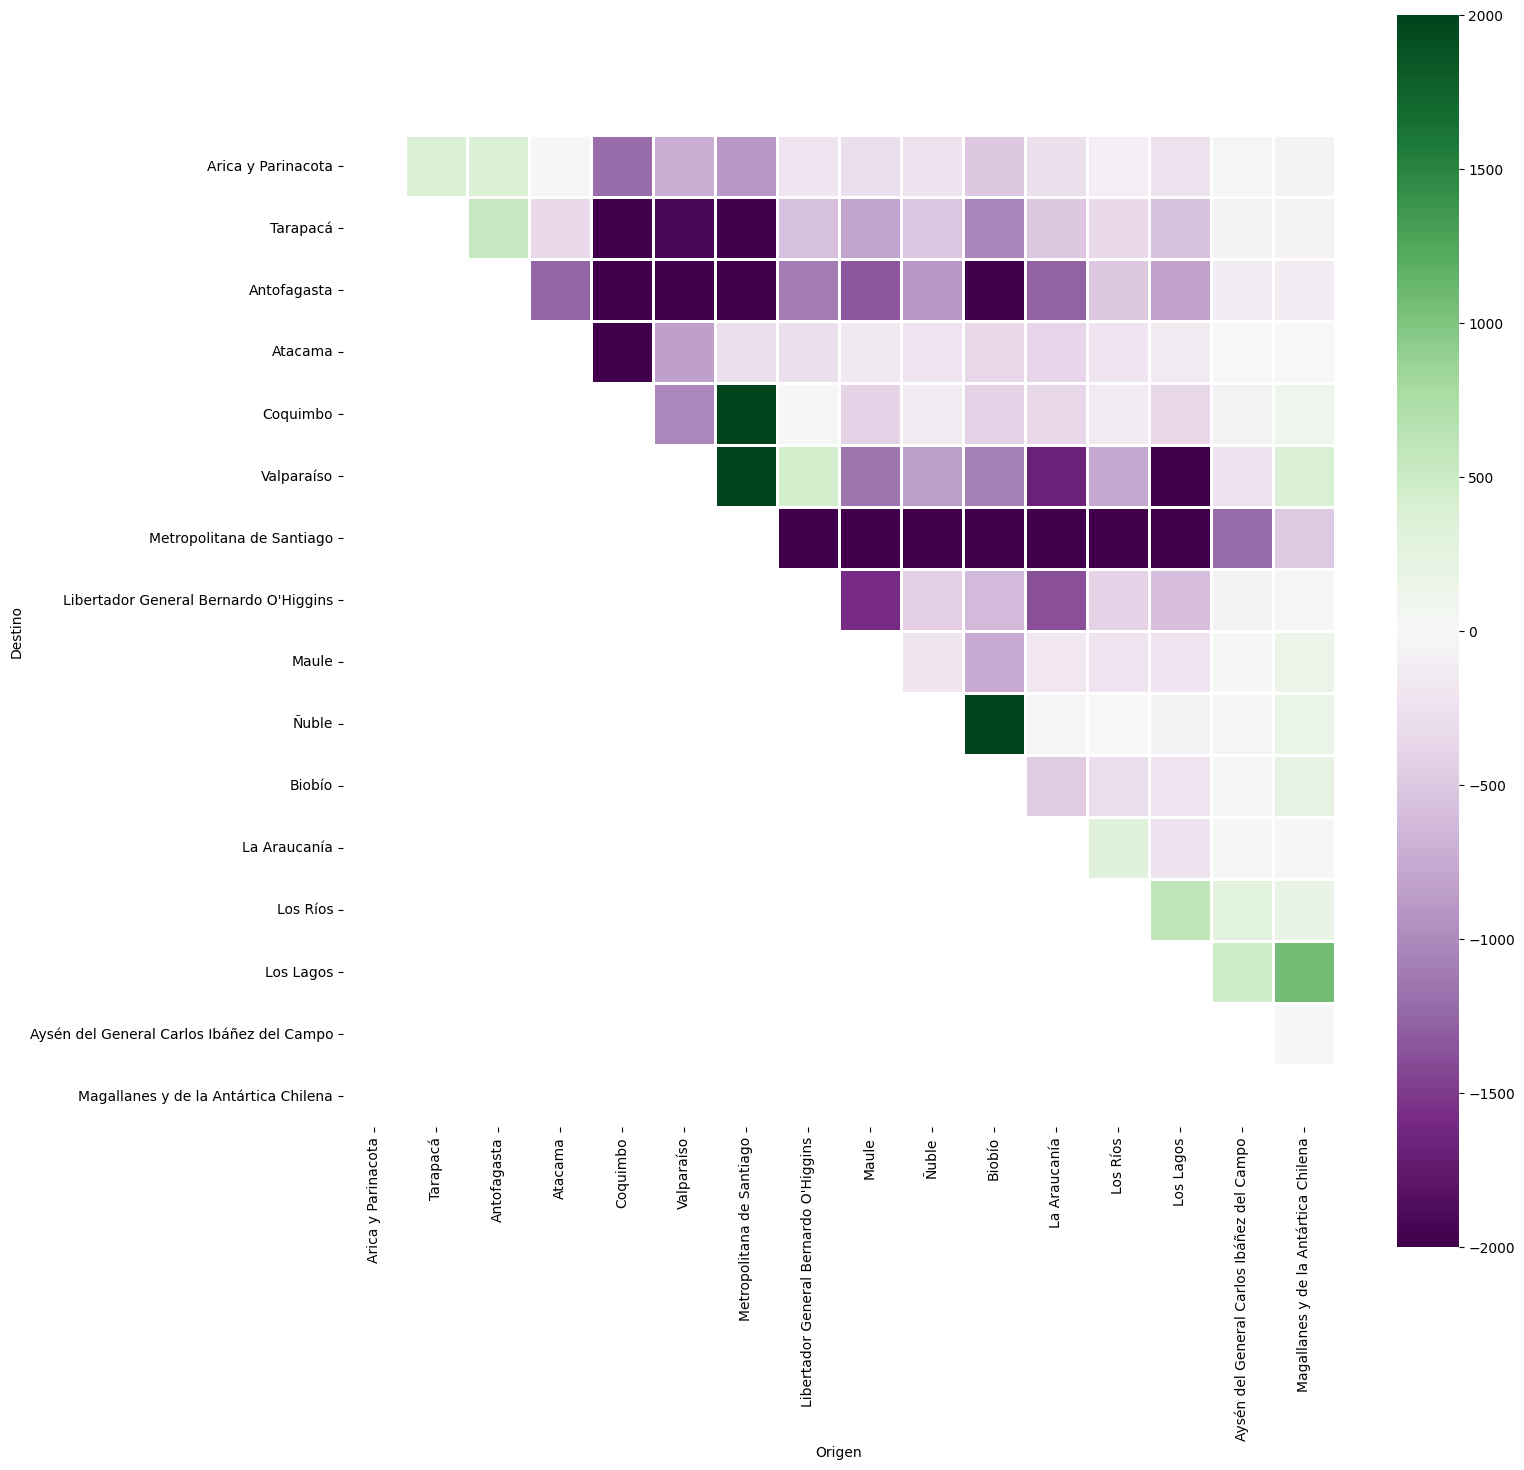

In [6]:
max_value = 2000

fig, ax = plt.subplots(1,1, figsize=(16,16))

sns.heatmap(data_net, cmap='PRGn', square=True, linewidths=1,
            vmin=-max_value, vmax=max_value)
plt.xlabel('Origen')
plt.ylabel('Destino')

plt.show()
